## Dades i packages

In [1]:
inastall.packages('ada',repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
require(ada)
require(adabag)
require(rpart)
source("prob.err.r")
data(iris)
names(iris)<-c("LS","AS","LP","AP","Species")

Loading required package: adabag
Loading required package: rpart
Loading required package: mlbench
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [3]:
require(ElemStatLearn)
data(vowel.train)
data(vowel.test)
vowel.train$y<-factor(vowel.train$y)
vowel.test$y<-factor(vowel.test$y)
vowel.bagging <- bagging(y~ ., data=vowel.train,mfinal=10)

Loading required package: ElemStatLearn


In [4]:
Steam<-read.table("DNA.splice.1.txt", header=TRUE)

## Continuació

In [5]:
library(ada)
require(rpart)
default<-rpart.control()
stump<-rpart.control(cp=-1,maxdepth=1,minsplit=0)
four<-rpart.control(cp= -1,maxdepth=2,minsplit=0)

In [7]:
n<-500
p<-10
f<-function(x, a, b, d) a * (x - b)^2 + d
    
set.seed(100)
x1<-runif(n/2, 0, 4)
y1<-f(x1, -1, 2, 1.7)+runif(n/2, -1, 1)
x2<-runif(n/2, 2, 6)
y2<-f(x2, 1, 4, -1.7)+runif(n/2, -1, 1)
y<-factor(c(rep(1, n/2), rep(2, n/2)))
mat<-matrix(rnorm(n * 8), ncol = 8)
dat<-data.frame(y = y, x1=c(x1,x2),x2=c(y1,y2),mat)
names(dat) <- c("y", paste("x", 1:10, sep = ""))

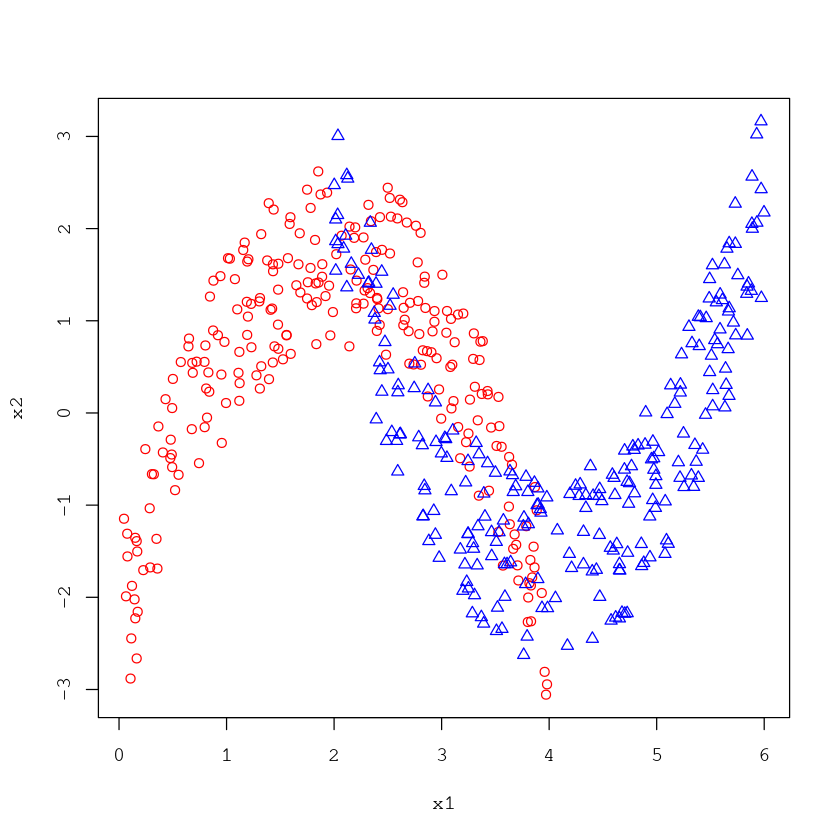

In [8]:
plot(dat$x1, dat$x2, pch = c(1:2)[y], col = c(2,4)[y], xlab=names(dat)[2], ylab=names(dat)[3])

In [9]:
indtrain <- sample(1:n, 100, FALSE)
train <- dat[indtrain,]
test <- dat[-indtrain,]

Provem primer classificar perabres

n= 100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 100 48 1 (0.52000000 0.48000000)  
   2) x1< 4.014779 69 17 1 (0.75362319 0.24637681)  
     4) x1< 1.989906 23  0 1 (1.00000000 0.00000000) *
     5) x1>=1.989906 46 17 1 (0.63043478 0.36956522)  
      10) x1>=3.599996 12  1 1 (0.91666667 0.08333333) *
      11) x1< 3.599996 34 16 1 (0.52941176 0.47058824)  
        22) x2>=-0.3981742 25  8 1 (0.68000000 0.32000000)  
          44) x10>=0.06958597 12  1 1 (0.91666667 0.08333333) *
          45) x10< 0.06958597 13  6 2 (0.46153846 0.53846154) *
        23) x2< -0.3981742 9  1 2 (0.11111111 0.88888889) *
   3) x1>=4.014779 31  0 2 (0.00000000 1.00000000) *

Call:
rpart(formula = y ~ ., data = train)
  n= 100 

          CP nsplit rel error xerror       xstd
1 0.64583333      0 1.0000000 1.1250 0.10383280
2 0.04861111      1 0.3541667 0.3750 0.08003905
3 0.02083333      4 0.2083333 0.5625 0.09249155
4 0.01000000      5 0.1875000 0.5000 0.08897565

Variable importance
 x1  x2 x10  x9  x5  x8  x4  x3  x6  x7 
 59  15   7   5   4   3   2   2   1   1 

Node number 1: 100 observations,    complexity param=0.6458333
  predicted class=1  expected loss=0.48  P(node) =1
    class counts:    52    48
   probabilities: 0.520 0.480 
  left son=2 (69 obs) right son=3 (31 obs)
  Primary splits:
      x1  < 4.014779    to the left,  improve=24.296810, (0 missing)
      x10 < -0.9848244  to the left,  improve= 3.406680, (0 missing)
      x6  < 0.9378558   to the right, improve= 3.259286, (0 missing)
      x4  < -1.444845   to the left,  improve= 2.191739, (0 missing)
      x5  < -0.4477934  to the left,  improve= 2.119005, (0 missing)
  Surrogate splits:


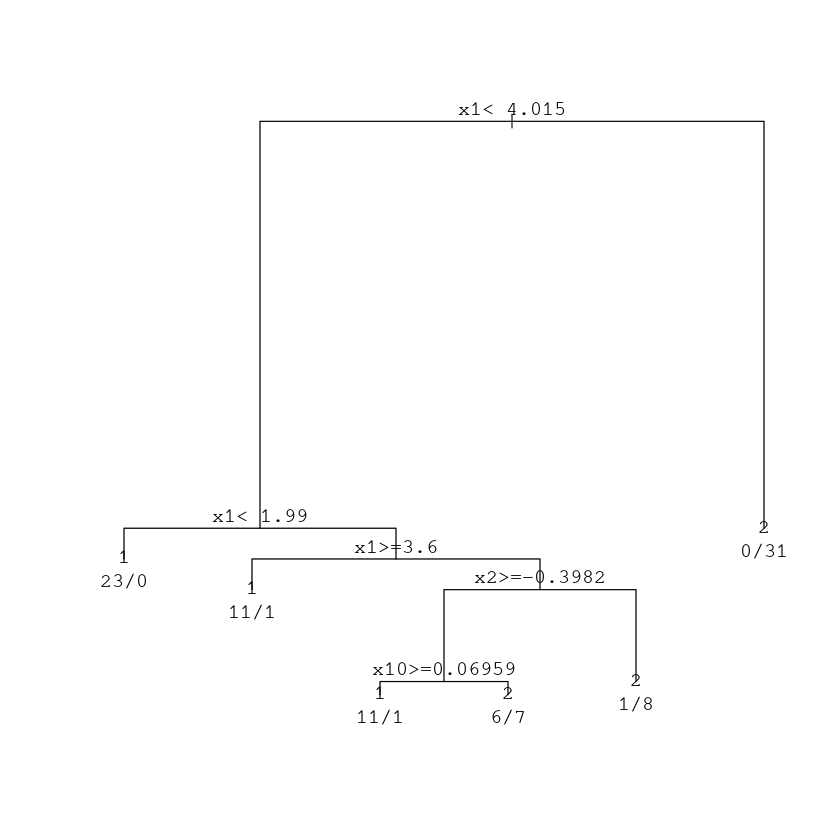

In [17]:
gdis<-rpart(y~.,data=train)
gdis
summary(gdis)
plot(gdis)
text(gdis,use.n=TRUE,xpd=2)

Ada amb control defauly

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = default)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 50  2
         2  5 43

Train Error: 0.07 

Out-Of-Bag Error:  0.11  iteration= 32 

Additional Estimates of number of iterations:

train.err1 train.kap1 
        50         50 


Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = default)

Loss: exponential Method: discrete   Iteration: 50 

Training Results

Accuracy: 0.93 Kappa: 0.859 



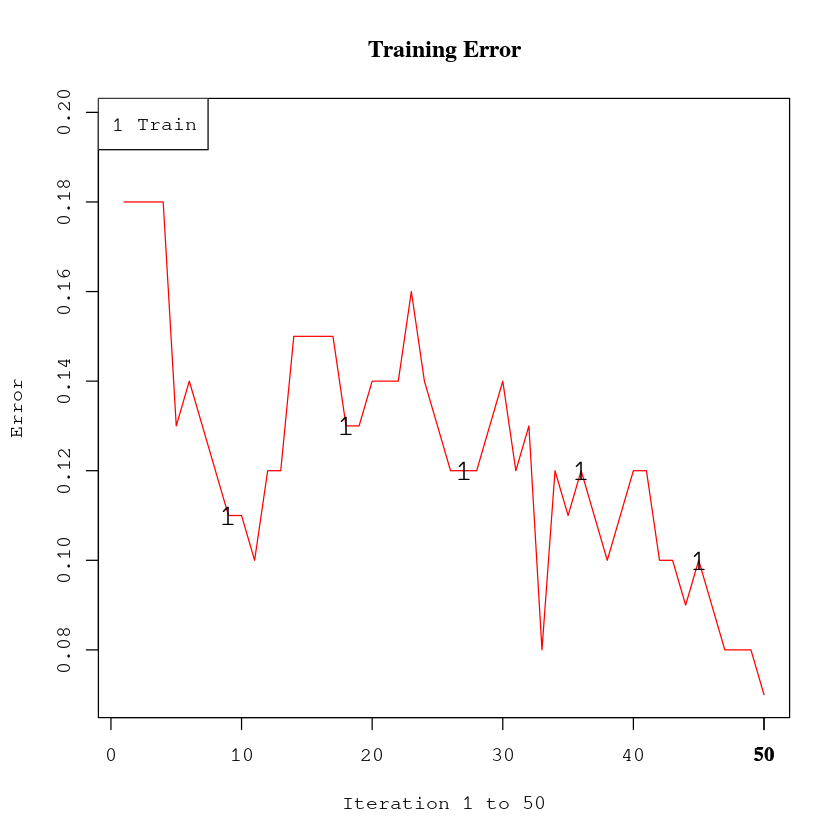

In [21]:
gdis <- ada(y~.,data=train, iter=50, loss="e",
type="discrete", control=default)
gdis
summary(gdis)
plot(gdis)

In [22]:
gdis1 <- addtest(gdis, test[,-1], test[,1])
gdis1

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = default)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 50  2
         2  5 43

Train Error: 0.07 

Out-Of-Bag Error:  0.11  iteration= 32 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
        50         50         31         31 


In [24]:
yhat<-predict(gdis,newdata=test)
T<-table(True=test$y,Pred=yhat)
T

    Pred
True   1   2
   1 182  16
   2  71 131

Control stump

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = stump)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 52  0
         2 17 31

Train Error: 0.17 

Out-Of-Bag Error:  0.17  iteration= 7 

Additional Estimates of number of iterations:

train.err1 train.kap1 
         2          2 


Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = stump)

Loss: exponential Method: discrete   Iteration: 50 

Training Results

Accuracy: 0.83 Kappa: 0.655 



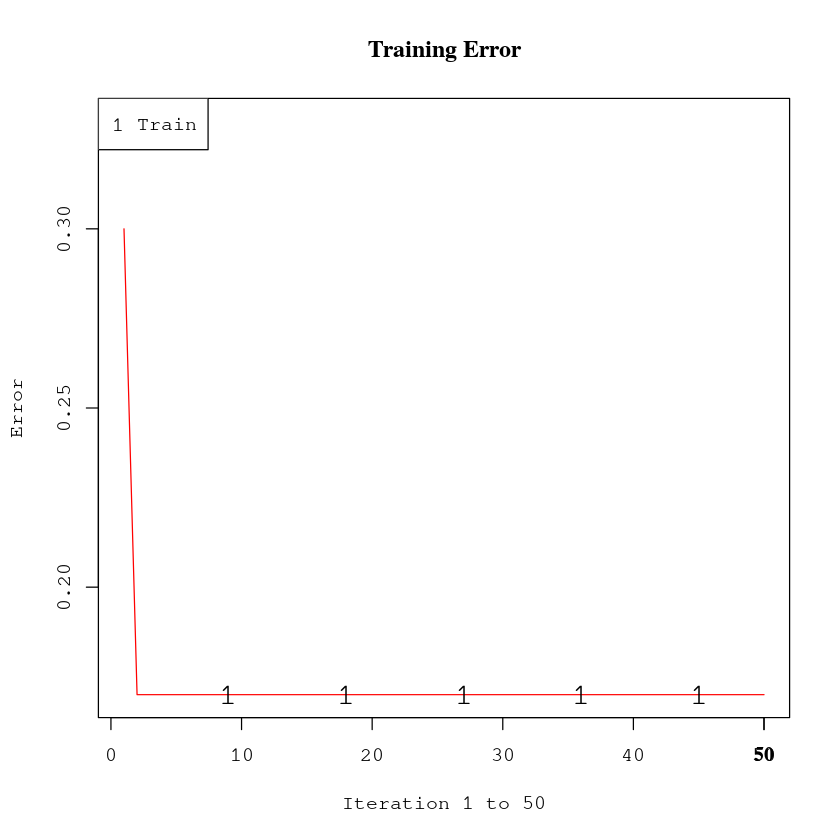

In [25]:
gdis <- ada(y~.,data=train, iter=50, loss="e",
type="discrete", control=stump)
gdis
summary(gdis)
plot(gdis)

In [26]:
gdis1 <- addtest(gdis, test[,-1], test[,1])
gdis1

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = stump)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 52  0
         2 17 31

Train Error: 0.17 

Out-Of-Bag Error:  0.17  iteration= 7 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
         2          2          1          1 


In [27]:
yhat<-predict(gdis,newdata=test)
T<-table(True=test$y,Pred=yhat)
T

    Pred
True   1   2
   1 198   0
   2  99 103

Control Four

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = four)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 50  2
         2  9 39

Train Error: 0.11 

Out-Of-Bag Error:  0.15  iteration= 49 

Additional Estimates of number of iterations:

train.err1 train.kap1 
        50         50 


Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = four)

Loss: exponential Method: discrete   Iteration: 50 

Training Results

Accuracy: 0.89 Kappa: 0.778 



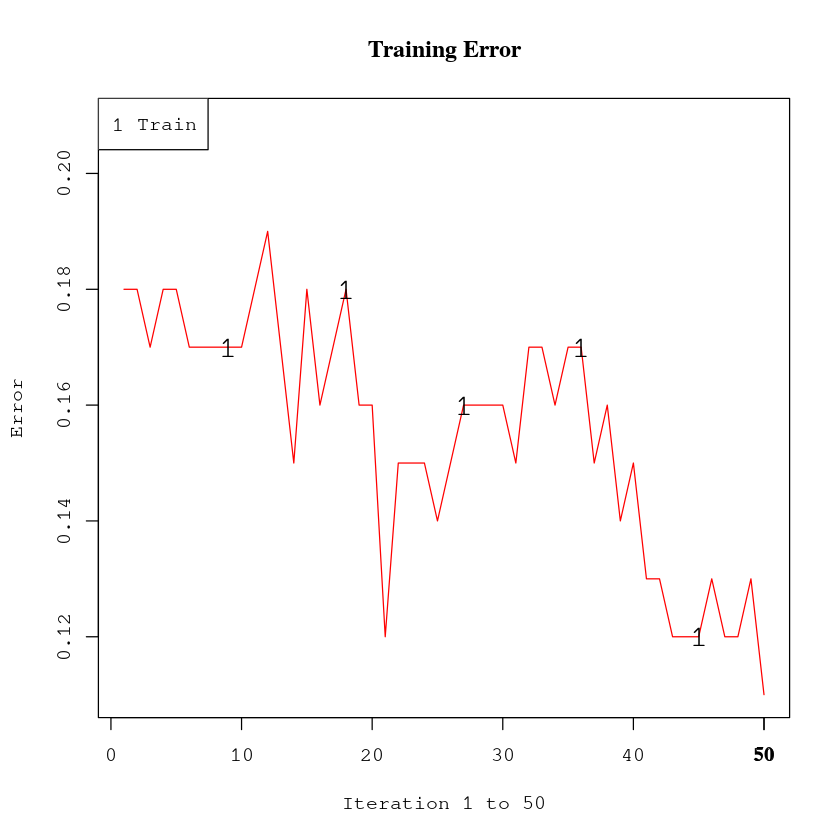

In [28]:
gdis <- ada(y~.,data=train, iter=50, loss="e",
type="discrete", control=four)
gdis
summary(gdis)
plot(gdis)

In [29]:
gdis1 <- addtest(gdis, test[,-1], test[,1])
gdis1

Call:
ada(y ~ ., data = train, iter = 50, loss = "e", type = "discrete", 
    control = four)

Loss: exponential Method: discrete   Iteration: 50 

Final Confusion Matrix for Data:
          Final Prediction
True value  1  2
         1 50  2
         2  9 39

Train Error: 0.11 

Out-Of-Bag Error:  0.15  iteration= 49 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
        50         50         21         21 


In [30]:
yhat<-predict(gdis,newdata=test)
T<-table(True=test$y,Pred=yhat)
T

    Pred
True   1   2
   1 188  10
   2  86 116